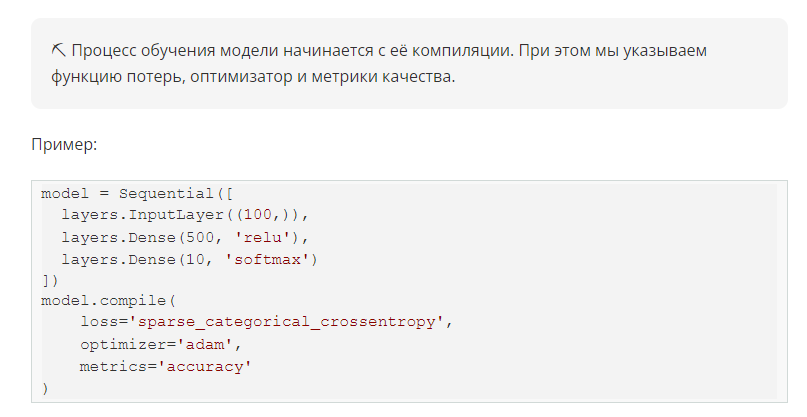

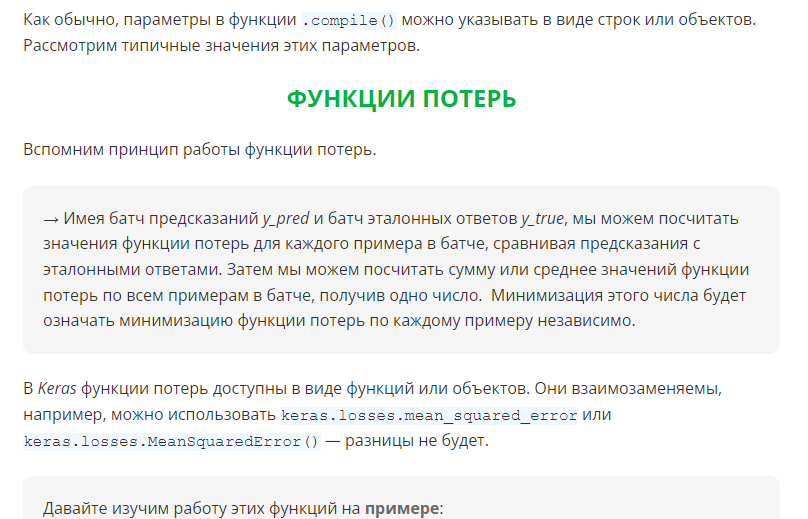

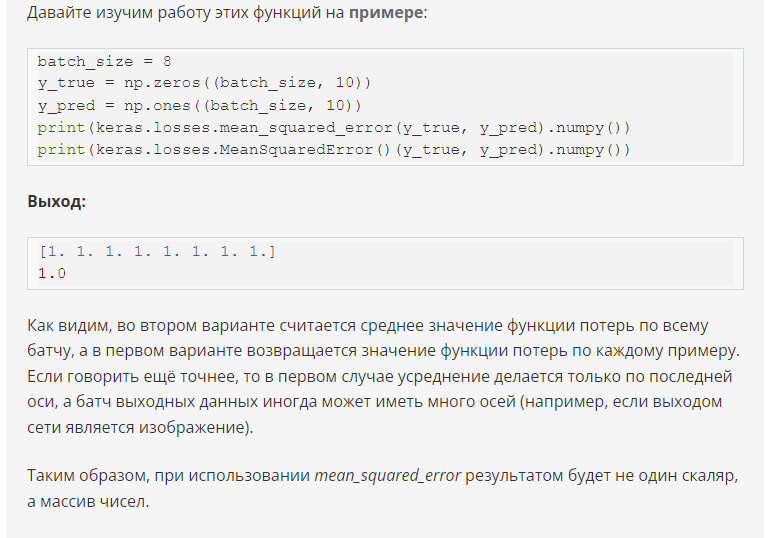

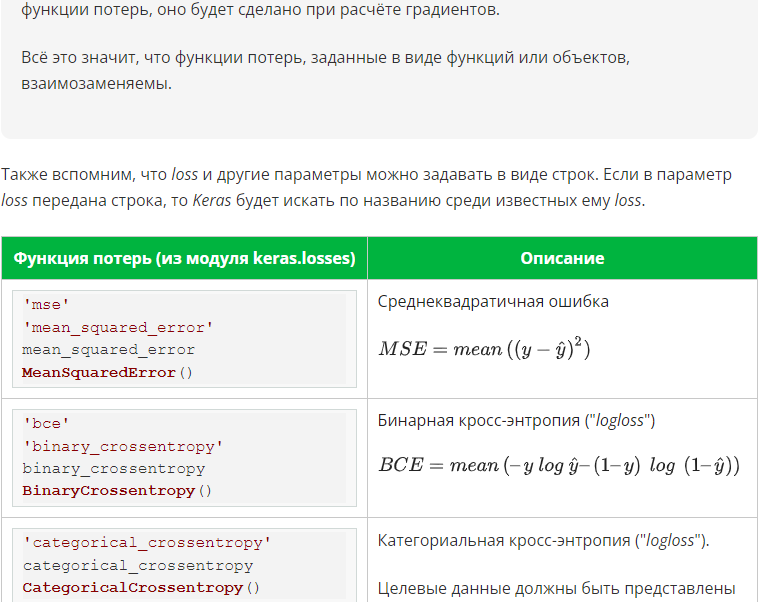

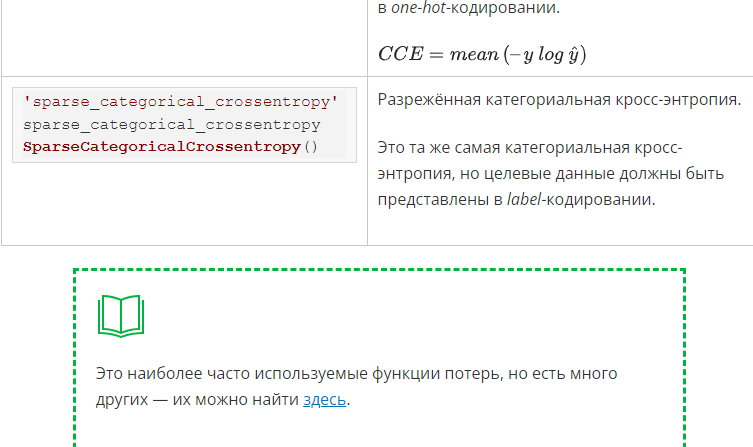

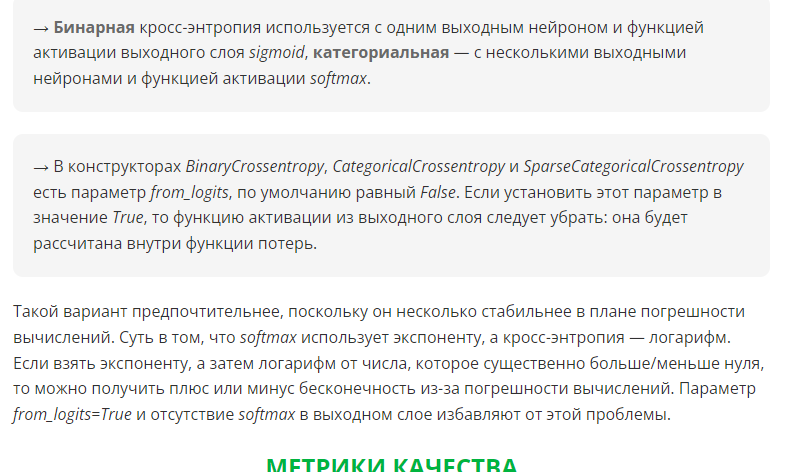

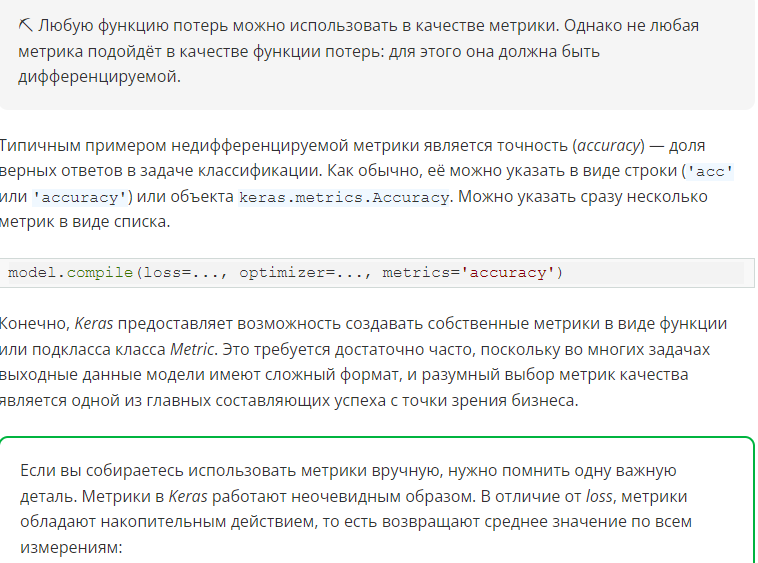

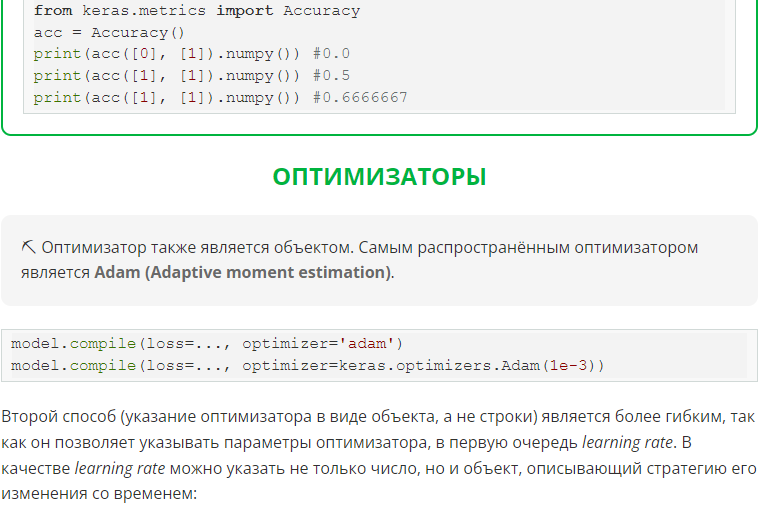

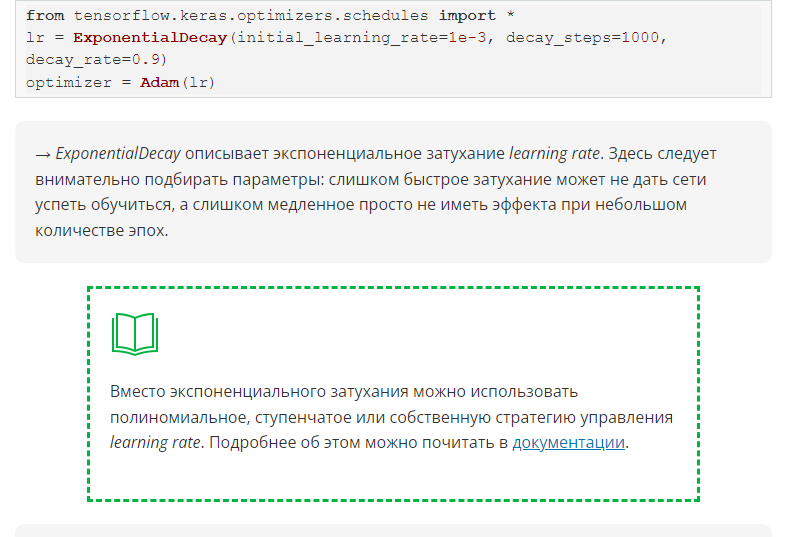

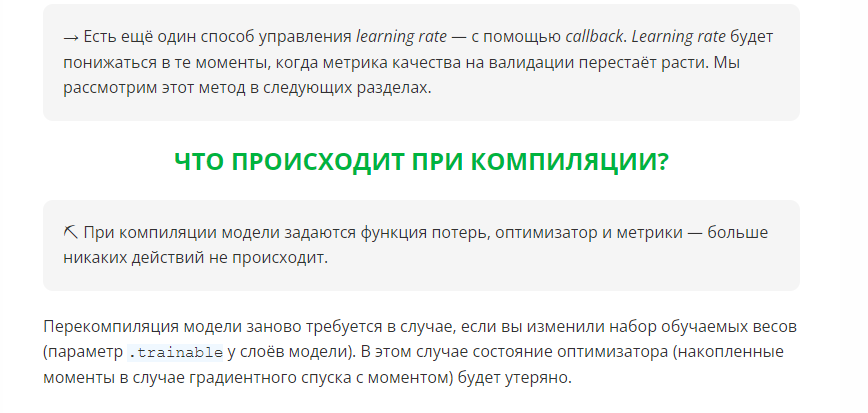

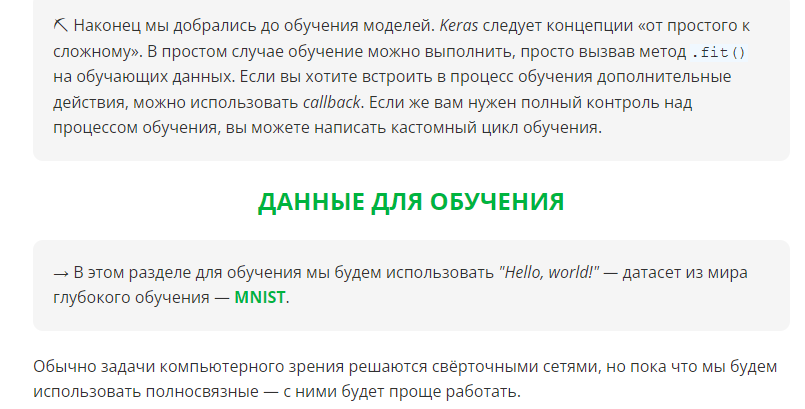

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255

print(X_train.shape, X_train.dtype) #(60000, 784) float64
print(X_test.shape, X_test.dtype) #(10000, 784) float64

print(y_train.shape, y_train[:10]) #(60000,) [5 0 4 1 9 2 1 3 1 4]
print(y_test.shape, y_test[:10]) #(10000,) [7 2 1 0 4 1 4 9 5 9]

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
  ax.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

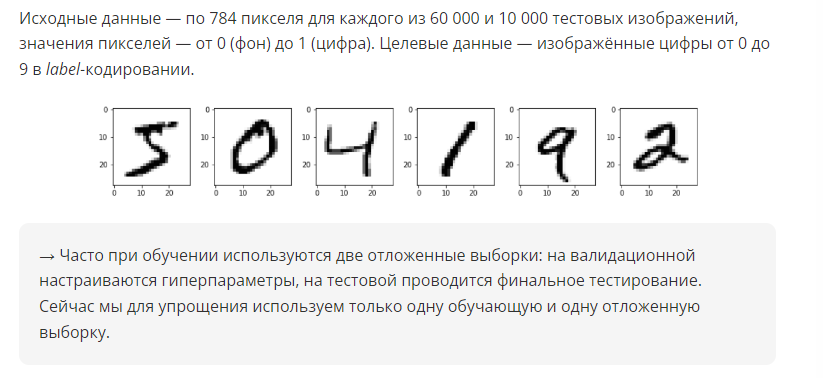

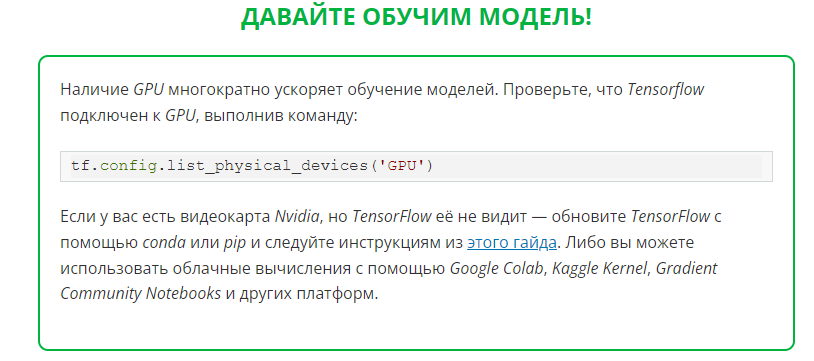

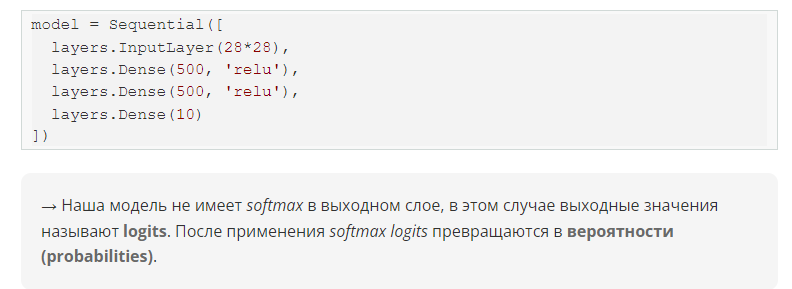

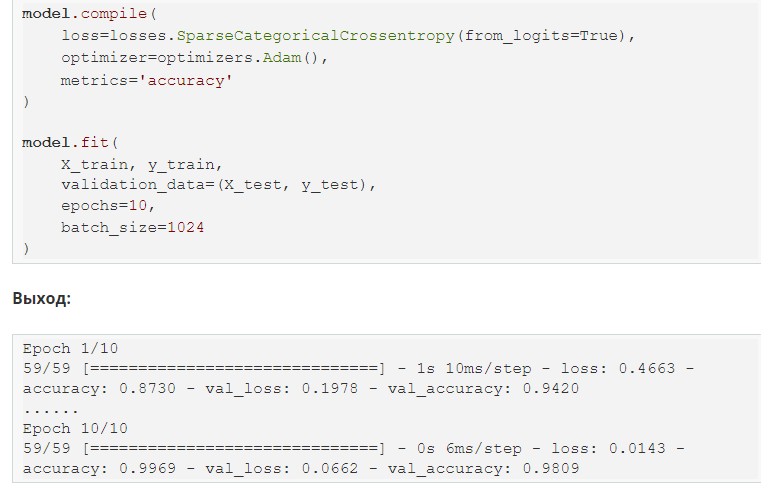

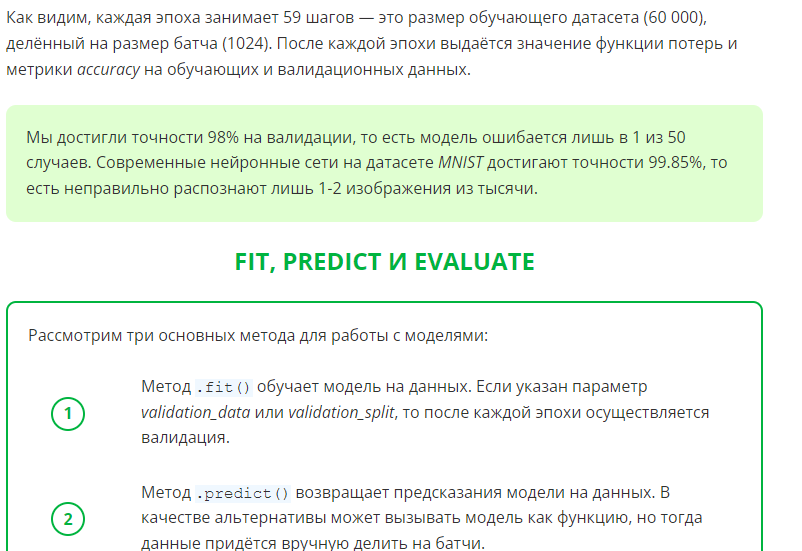

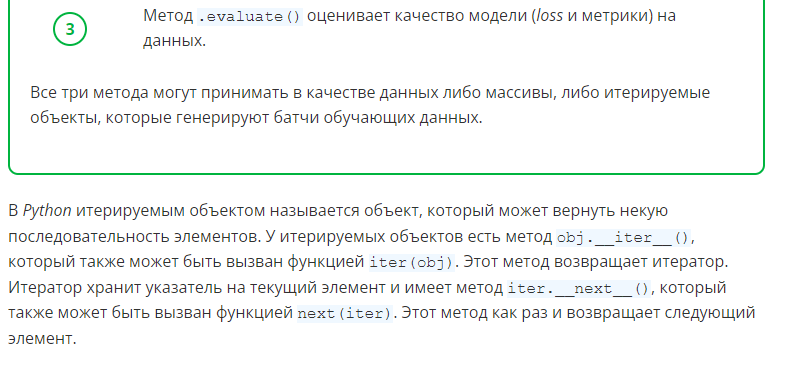

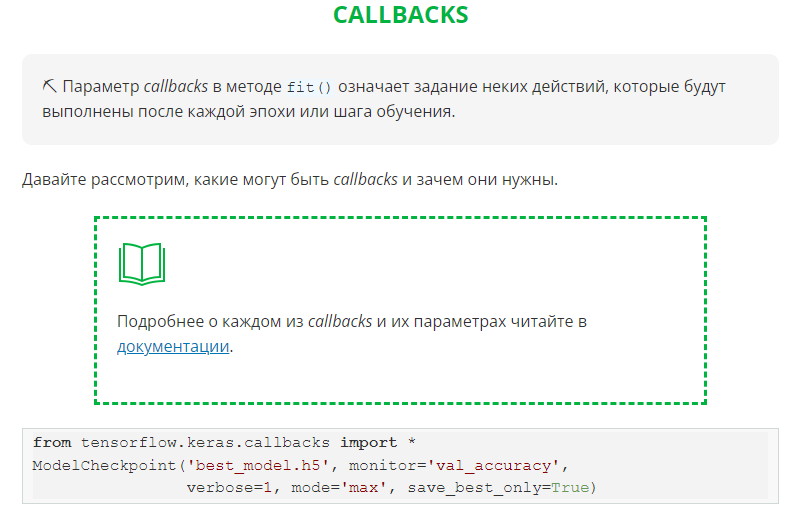

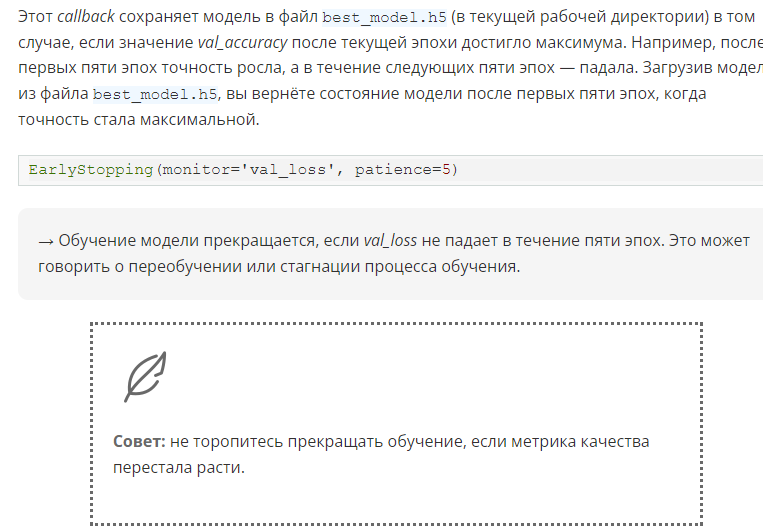

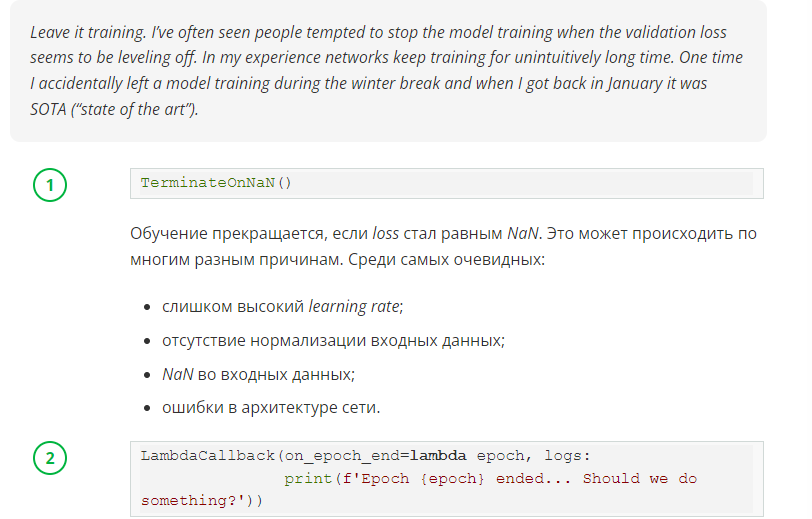

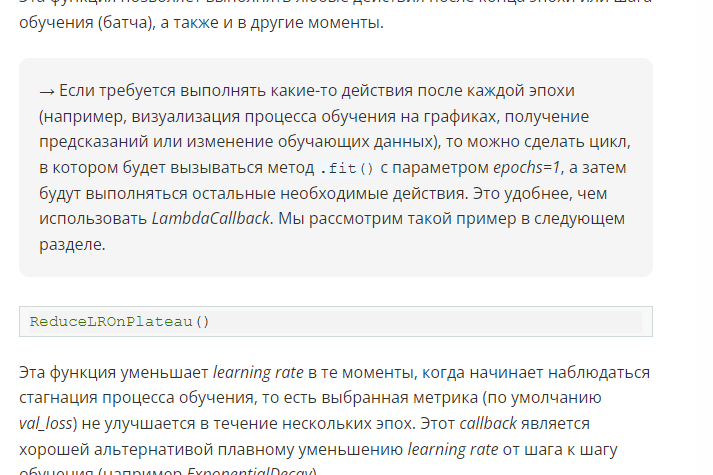

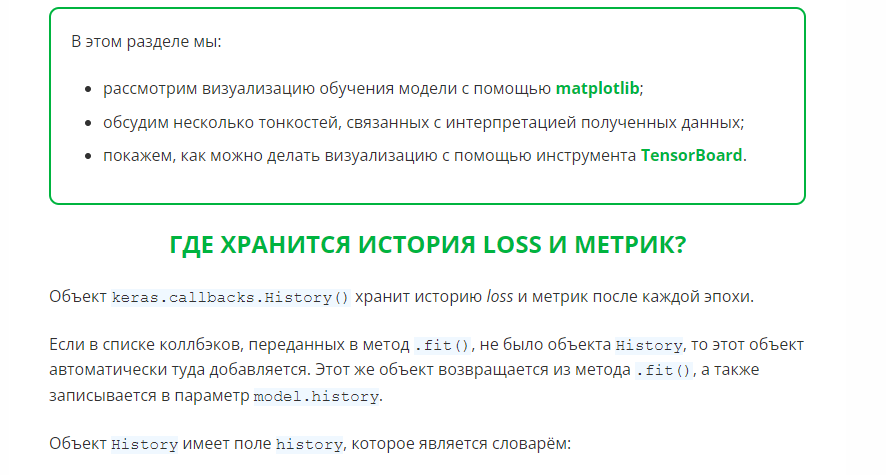

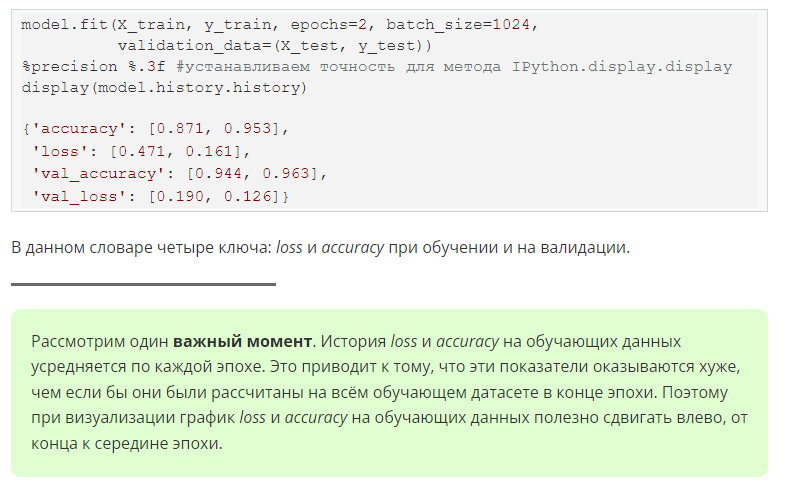

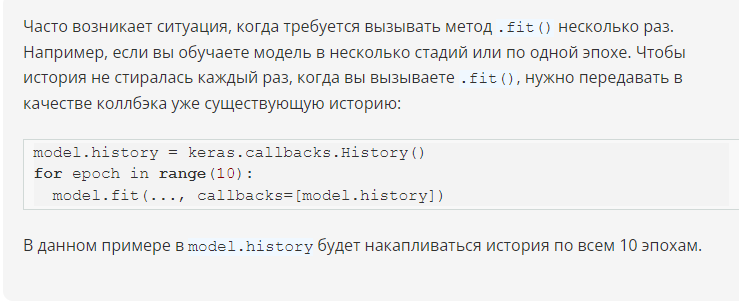

РИСУЕМ ИСТОРИЮ С ПОМОЩЬЮ MATPLOTLIB

⛏ Мы будем использовать ручной цикл, обучая модель по одной эпохе, а затем делая визуализацию. Такой подход более гибкий, чем использование LambdaCallback. Кроме того, в функционировании LambdaCallback есть несколько неочевидных моментов, так что по возможности его лучше избегать.

In [ ]:
from IPython.display import clear_output

model = Sequential([
  layers.InputLayer(28*28),
  layers.Dense(500, 'relu'),
  layers.Dense(500, 'relu'),
  layers.Dense(10)
])

model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics='accuracy'
)

def visualize(history):
  clear_output(wait=True)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  epochs = len(history.history['loss'])
  # на первом графике рисуем loss
  ax1.plot(np.arange(epochs) + 0.5, history.history['loss'], label='loss')
  ax1.plot(np.arange(epochs) + 1, history.history['val_loss'], label='val_loss')
  ax1.set_xscale('log')
  ax1.set_yscale('log')
  ax1.legend()
  ax1.grid()
  # на втором графике рисуем accuracy
  ax2.plot(np.arange(epochs) + 0.5, history.history['accuracy'], label='accuracy')
  ax2.plot(np.arange(epochs) + 1, history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xscale('log')
  ax2.legend()
  ax2.grid()
  plt.show()

model.history = keras.callbacks.History()
for epoch in range(50):
  model.fit(X_train, y_train, epochs=1, batch_size=1024,
            validation_data=(X_test, y_test), callbacks=[model.history])
  visualize(model.history)

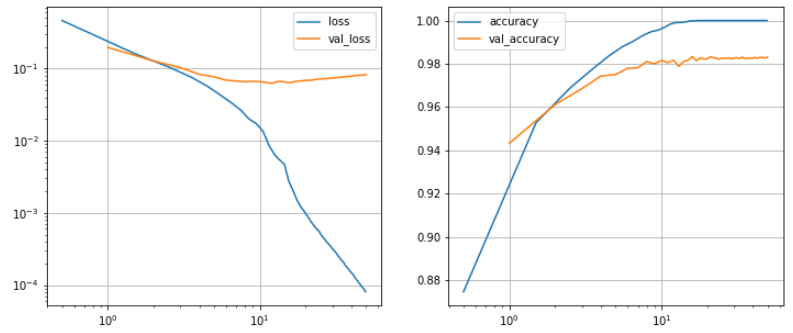

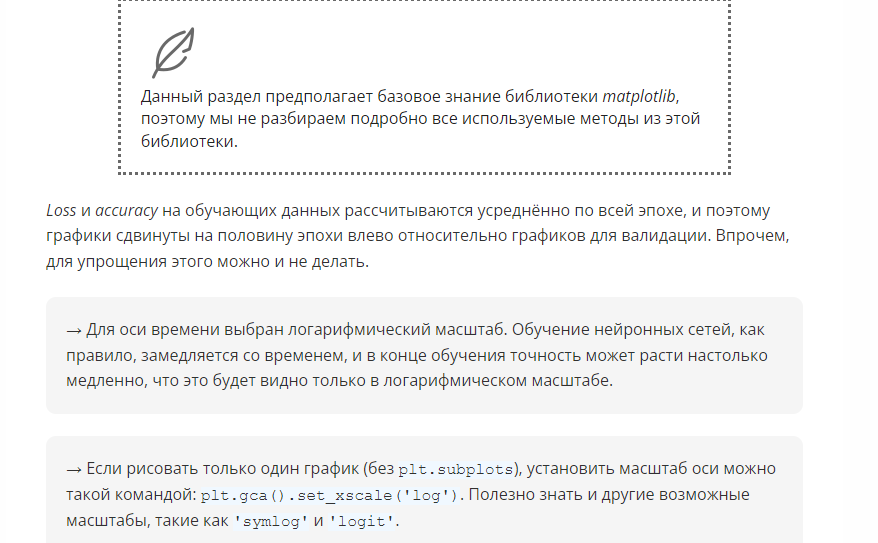

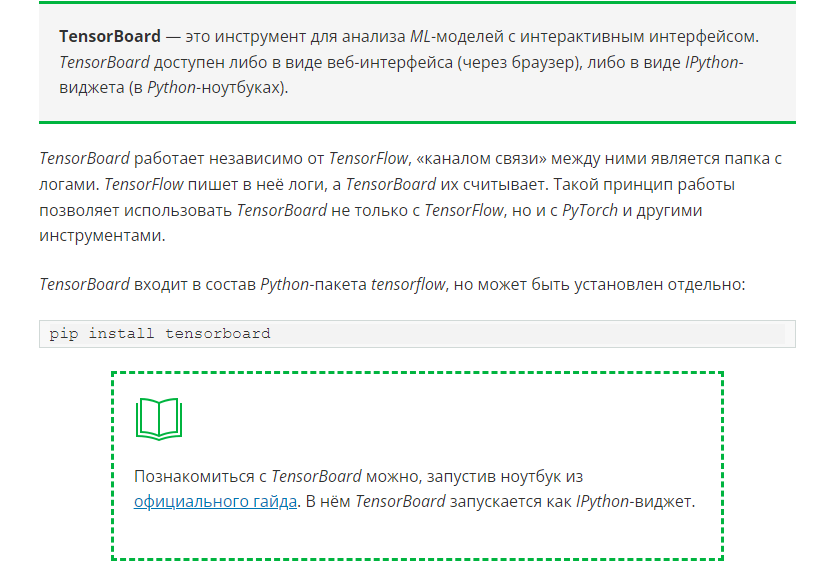

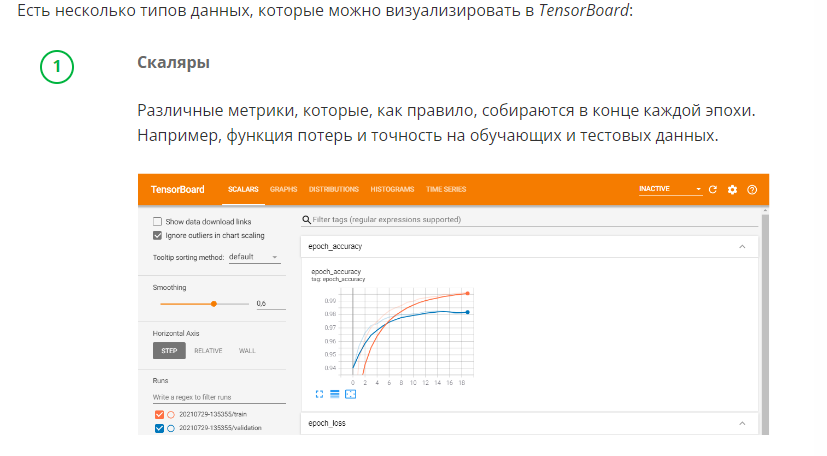

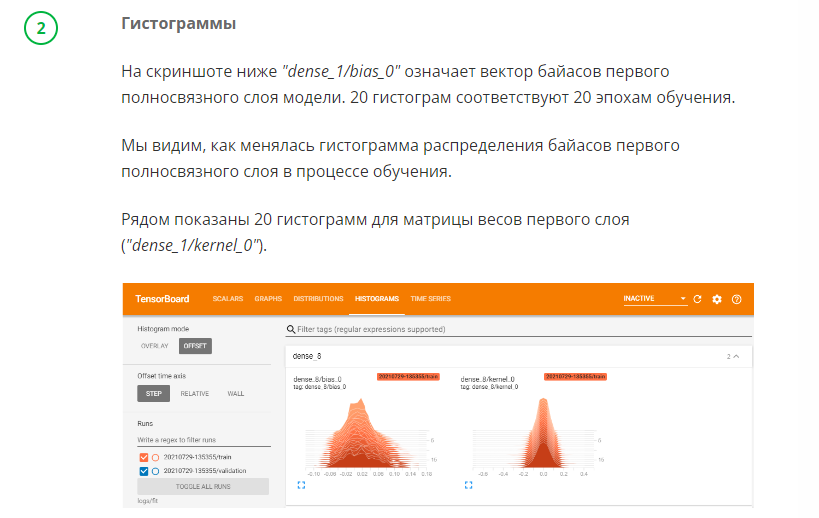

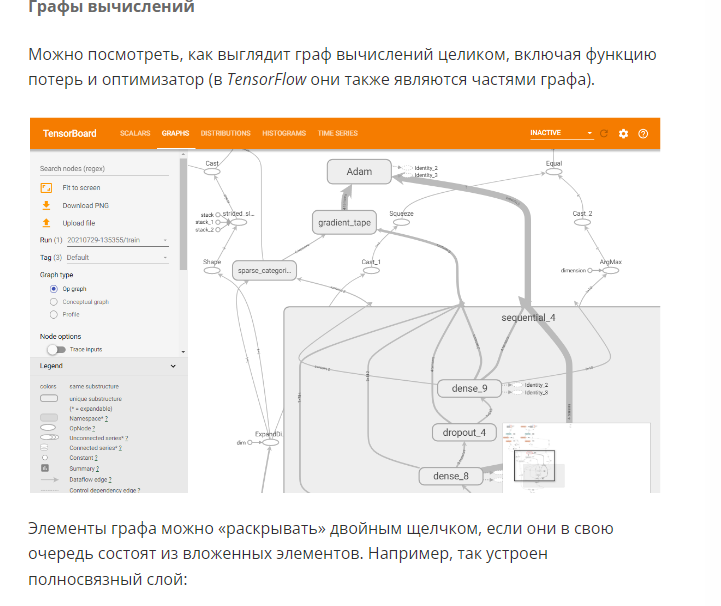

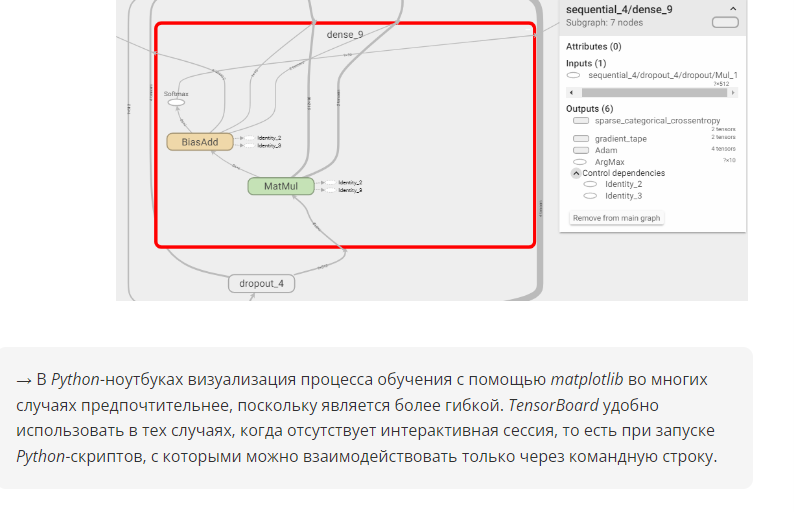